# Loan Prediction
- Author: Philip Yoon
- Date: 11/30/19
- Dataset: [AnalyticsVidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

### Problem Statement
About: 
A finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem:
The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those that are eligible for loan amount, so that they can specifically target these customers.

### Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("/Users/philipyoon/python/loan_prediction/train.csv") 


In [4]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
df.describe() # summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There is a possible skew in the data given that ApplicantIncome's mean is a fair bit away from the median (50% figure).

For the non-numerical variables, we will look at frequency distributions.

In [7]:
df['Property_Area'].value_counts() 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

### Distribution Analysis
Given the criteria of giving loans, the most important variables are probably ApplicantIncome and LoanAmount.

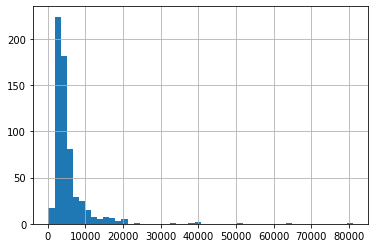

In [8]:
df['ApplicantIncome'].hist(bins=50)

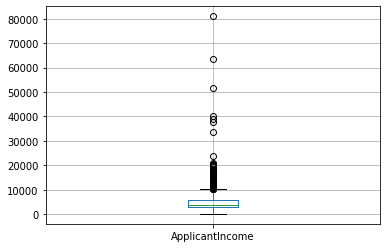

In [9]:
df.boxplot(column='ApplicantIncome')

The histogram and boxplot show there are a fair number of outliers. This can probably be explained by the income disparity in society. Since education levels may explain this disparity, we will segregate them by education.

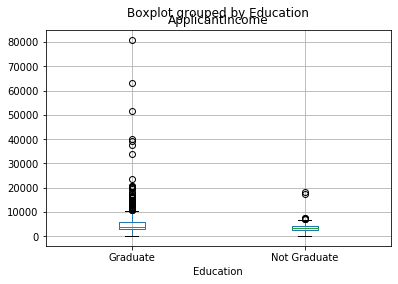

In [10]:
df.boxplot(column='ApplicantIncome', by='Education')

There doesn't seem to be a difference in mean income between the two groups; however, there are a higher number of graduates with high income which account for the outliers. 

Now we will look at the histogram and boxplot of Loan Amount.

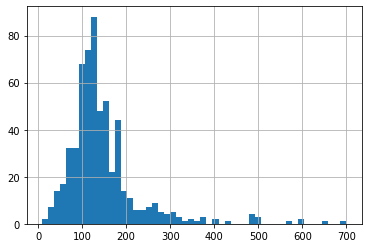

In [11]:
df['LoanAmount'].hist(bins=50)

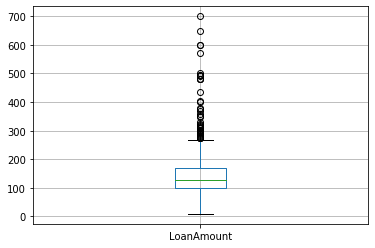

In [12]:
df.boxplot(column='LoanAmount')

Again there are extreme values. Both ApplicantIncome and LoanAmount will require some amount of data munging. 

### Categorical Variable Analysis

In [13]:
# Create a pivot table 
# https://pbpython.com/pandas-pivot-table-explained.html
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], 
                      aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Credit History')
print(temp1)

print('\nProbability of getting loan depending on Credit History')
print(temp2)

Frequency Table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan depending on Credit History
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


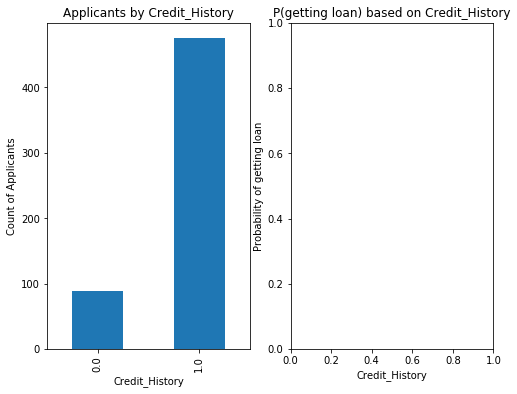

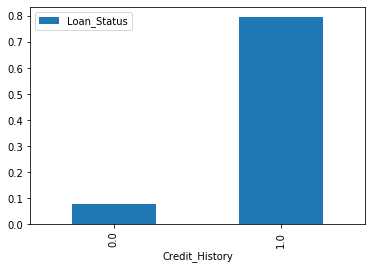

In [14]:
# Plot the pivot table using matplotlib
fig = plt.figure(figsize=(8,6))
plt.tight_layout()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit_History')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('P(getting loan) based on Credit_History')
temp2.plot(kind='bar')

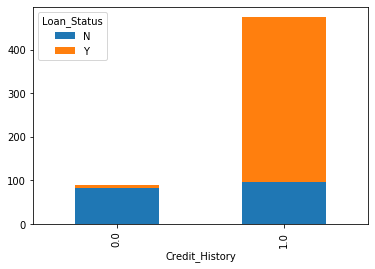

In [15]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True)

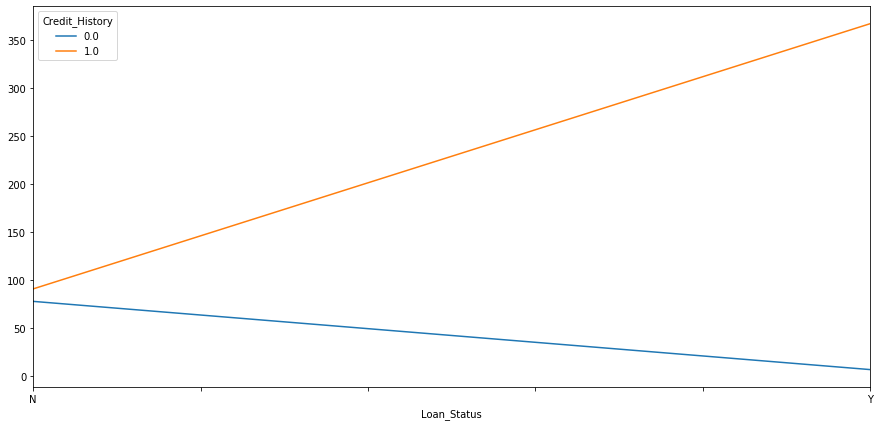

In [16]:
# testing groupby instead of crossbar
#gk = df.groupby('Credit_History')
#print(gk.head())
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['Loan_Status','Credit_History']).count()['LoanAmount'].unstack().plot(ax=ax)

### Data Munging

Some problems so far:
1. There are missing values in some of the variables. 
2. While looking at the distributions, we see that ApplicantIncome and LoanAmount seem to contain extreme values at either end

**First, we will take a look at the missing values.**

In [17]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [18]:
print((df[:]==0).sum())

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64


0's are only a missing value for certain variables, but for CoapplicantIncome and Credit_History it makes sense. 

The simplest option to handle the missing data is to remove the missing value entries.  

In [19]:
df.dropna(inplace=True)

Alternatively, we could have imputed missing values such as replacing NaN by mean or value estimated by another predictive model.

**Now we will treat the extreme values in distribution of LoanAmount and ApplicantIncome.** First, LoanAmount. Since the extreme values for LoanAmount are technically possible, we won't treat them as outliers but simply try a log transformation to lessen their effect.

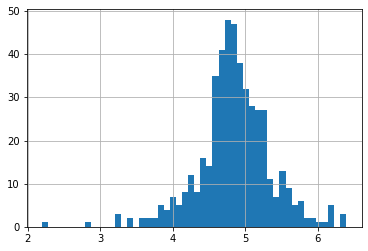

In [20]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=50)

This distribution seems much closer to normal and the effect of extreme LoanAmount has significantly been reduced.

Next, ApplicantIncome. Since some applicants might have lower income but have a lot of support from co-applicants, we will combine both incomes as total income and log transform.

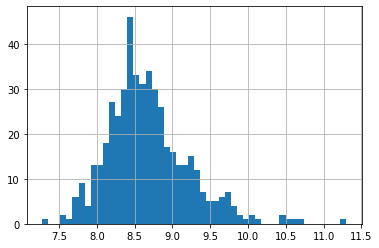

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=50)

This distribution is much better than before. 

### Predictive Modeling
Now that the data useful for modeling, we will try to build a predictive model on our dataset.

Sklearn requires numeric inputs, so we will convert our categorical variables into numeric by encoding the categories. 

In [22]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 
           'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

All categorical variables have successfully been encoded as numerical. 

Next, importing required modules and using a 10 fold cross validation procedure to evaluate the performances of Logistic Regression, SVM, and Decision Tree classifiers. The predictor variable will be ApplicantIncome and the target variable will be Loan_Status. 

In [39]:
#initial primitive way to do it, but did not work because all the numbers were the same.
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
#cross_validate(DecisionTreeClassifier(), 
#                                 df[['Credit_History']], 
#                                 df['Loan_Status'], cv = 5)

#cross_validate(LogisticRegression(), 
#                                df[['Credit_History']], 
#                                df['Loan_Status'], cv=5)
#https://www.youtube.com/watch?v=gJo0uNL-5Qw                                


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import metrics

# df.drop(['Loan_ID'],axis=1, inplace=True)
# drop Loan_ID bc its an object and doesn't help our model

# preparing models 
models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
seed = 7 # ensures same splits to the training data
x = df[['ApplicantIncome', 'Credit_History', 'Education']]
y = df['Loan_Status']

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.808333 (0.050000)
DTC: 0.695833 (0.055277)
SVM: 0.668750 (0.040020)


We printed out a list of the models used and their corresponding mean accuracy and standard deviation accuracy.

We will also provide a box plot showing the spread of accuracy scores across each algorithm.

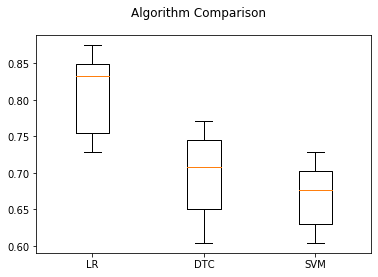

In [44]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Logistic regression seems to have performed well compared to less stellar results from the decision tree and SVM algorithm. 

From here feature engineering will help us determine what best collection of predictors we need to use for a best middle of the line model that is not under or overfit.